# Implementing Perceptron

In [ ]:
import numpy as np
import os
import pandas as pd 
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron(object):
    """Perceptron classifier
    Parameters
    ----------
    eta : float
        learning rate

    n_iter : numeric
        number of iterations to run and update weights
    
    random_state : numeric
        random initialization of weights

    Attributes
    ----------
    w_ : 1d-array
        final weights after fit; w_[0] represents the bias term
    errors_ : list
        number of misclassifications (updates) after each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """fitting the training data
        Parameters
        ----------
        X : matrix
            feature set of independent variables
        y : 1d-array
            target variables
        
        Returns
        ----------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # small random numbers from normal(0,0.01) to initialize
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self 

    def net_input(self, X):
        """ compute step function input from weights and input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ step function classifier; returns class label """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### Testing Perceptron on Iris Data

In [3]:
# import os
# import pandas as pd 
def wjoin(*args, **kwargs):
    return os.path.join(*args, **kwargs).replace(os.path.sep, "/")
s = wjoin('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris','iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv(s,
                header=None,
                encoding='utf-8')
df.tail

<bound method NDFrame.tail of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
import matplotlib.pyplot as plt 

In [31]:
# get the setosa and versicolor values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [32]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

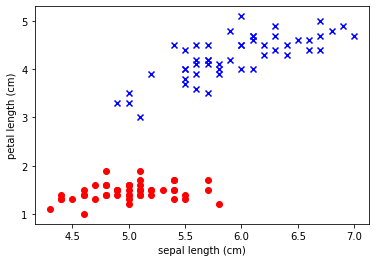

In [33]:
# plot data 
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='sertosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

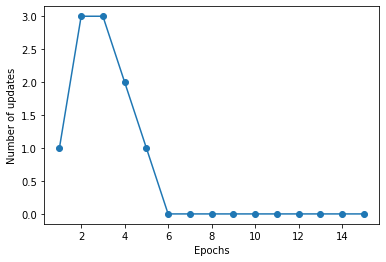

In [34]:
# apply the perceptron to the data
ppn = Perceptron(eta=0.01, n_iter=15)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Looking at the performance based on decision regions.

<ipython-input-35-3a25c390e272>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


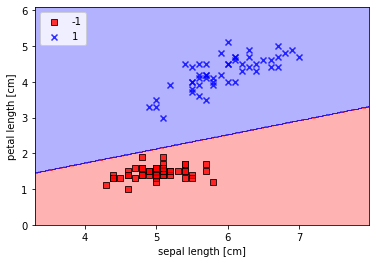

In [35]:
# from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')




plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

# Implementing Adaline with Batch Gradient Descent

In [36]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier
    Parameters
    ----------
    eta : float
        learning rate between (0.0 and 1.0)

    n_iter : numeric
        number of iterations to run and update weights
    
    random_state : numeric
        random initialization of weights

    Attributes
    ----------
    w_ : 1d-array
        final weights after fit; w_[0] represents the bias term
    cost_ : list
        sums-of-squares cost function value in each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """fitting the training data
        Parameters
        ----------
        X : matrix
            feature set of independent variables
        y : 1d-array
            target variables
        
        Returns
        ----------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # small random numbers from normal(0,0.01) to initialize
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])

        self.cost_ = []

        for i in range(self.n_iter):
            """
            Update pseudo code:
            update = (learning rate) * (negative gradient)
            gradient(cost) = sum((y - activation(net_input))*xi)
            learning_rule = weights + update
            """
            net_input = self.net_input(X)
            output = self.activation_identity(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self

    def activation_identity(self, X):
        """Identity activation function"""
        return X

    def net_input(self, X):
        """ compute step function input from weights and input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ step function classifier; returns class label """
        return np.where(self.activation_identity(self.net_input(X)) >= 0.0, 1, -1)

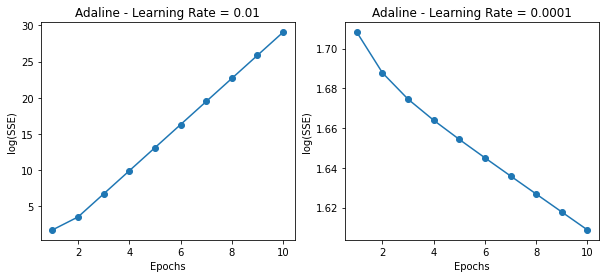

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1),
            np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning Rate = 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_) + 1),
            np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SSE)')
ax[1].set_title('Adaline - Learning Rate = 0.0001')

plt.show()

Standardization should allow the gradient descent to converge faster. Let's test the concept.

In [43]:
def standardize(X):
    """takes in a variable and standardizes it"""
    X_std = np.copy(X)
    for i in range(X.shape[1]):
        X_std[:,i] = (X[:,i] - X[:,i].mean()) / X[:,i].std()
    return X_std

X_std = standardize(X)

<ipython-input-35-3a25c390e272>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


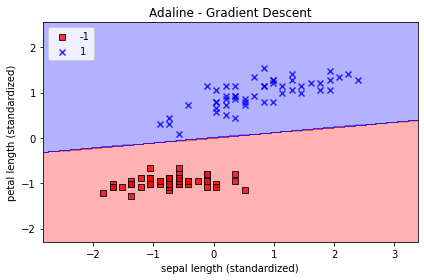

In [41]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length (standardized)')
plt.ylabel('petal length (standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

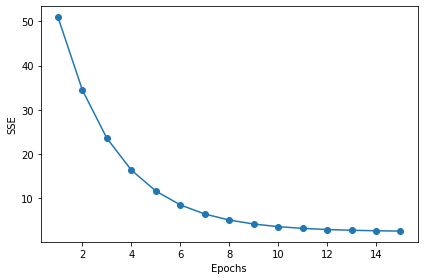

In [42]:
plt.plot(range(1, len(ada_gd.cost_) + 1),
        ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()
plt.show()

Previously when we used `eta=0.01` the model failed to converge. Now with the variables standardized we see that we can obtain convergence. 

# Implementing Adaline with Stochastic Gradient Descent

In [63]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier
    Parameters
    ----------
    eta : float
        learning rate between (0.0 and 1.0)

    n_iter : numeric
        number of iterations to run and update weights
    
    shuffle : bool
        Shuffles the training data every epoch if True
    
    random_state : numeric
        random initialization of weights

    Attributes
    ----------
    w_ : 1d-array
        final weights after fit; w_[0] represents the bias term
    cost_ : list
        sums-of-squares cost function value in each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state ## Needs a shuffler
    
    def fit(self, X, y):
        """fitting the training data
        Parameters
        ----------
        X : matrix
            feature set of independent variables
        y : 1d-array
            target variables
        
        Returns
        ----------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            """
            Update pseudo code:
                net_input = self.net_input(xi)
                output = self.activation_identity(net_input)
                error = (y - output)
                self.w_[1:] += self.eta * error * xi
                self.w_[0:] += self.eta * error
                cost = (error**2)/2.0
                self.cost_.append(cost)
            """
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fitting training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle the training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """initialize the weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                              size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """ apply adaline learning rule to update weights """
        net_input = self.net_input(xi)
        output = self.activation_identity(net_input)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0:] += self.eta * error
        cost = (error**2)/2.0
        return cost

    def activation_identity(self, X):
        """Identity activation function"""
        return X

    def net_input(self, X):
        """ compute step function input from weights and input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ step function classifier; returns class label """
        return np.where(self.activation_identity(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-35-3a25c390e272>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


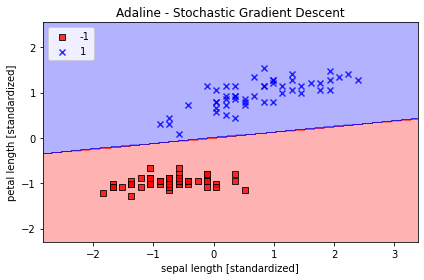

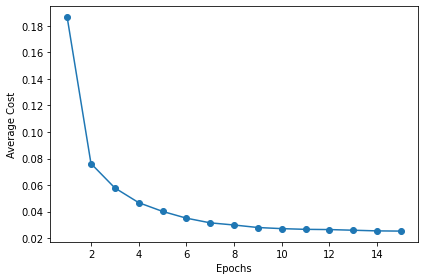

In [64]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

In [66]:
#X_std[0, :].shape[1]
ada_sgd.partial_fit(X_std[0, :], y[0])

NameError: name 'self_' is not defined